In [22]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import os
import json
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
from nerfstudio.utils.eval_utils import eval_setup
from plane_nerf.inerf_utils import load_eval_image_into_pipeline

In [24]:
os.chdir('/workspace/plane-nerf/')
MODEL_PATH = "/workspace/plane-nerf/outputs/jackal_training_data_2_fifth/plane-nerf/2024-03-07_125436" 
DATA_PATH = "/stored_data/jackal_evaluation_data"
GROUND_TRUTH_PATH = os.path.join(DATA_PATH, "ground_truth.json")
config_path = os.path.join(MODEL_PATH, "config.yml")
config, pipeline, _, _ = eval_setup(
                        Path(config_path),
                        test_mode="inference",
                    )
transform_file_path = os.path.join(DATA_PATH, "transforms.json")
with open(os.path.join(DATA_PATH, transform_file_path)) as f:
    transform = json.load(f)


tiny-cuda-nn warning: FullyFusedMLP is not supported for the selected architecture 52. Falling back to CutlassMLP. For maximum performance, raise the target GPU architecture to 75+.
tiny-cuda-nn warning: FullyFusedMLP is not supported for the selected architecture 52. Falling back to CutlassMLP. For maximum performance, raise the target GPU architecture to 75+.
tiny-cuda-nn warning: FullyFusedMLP is not supported for the selected architecture 52. Falling back to CutlassMLP. For maximum performance, raise the target GPU architecture to 75+.
tiny-cuda-nn warning: FullyFusedMLP is not supported for the selected architecture 52. Falling back to CutlassMLP. For maximum performance, raise the target GPU architecture to 75+.
tiny-cuda-nn warning: FullyFusedMLP is not supported for the selected architecture 52. Falling back to CutlassMLP. For maximum performance, raise the target GPU architecture to 75+.
tiny-cuda-nn warning: FullyFusedMLP is not supported for the selected architecture 52. Fal

Loading latest checkpoint from load_dir

✅ Done loading checkpoint from 
outputs/jackal_training_data_2_fifth/plane-nerf/2024-03-07_125436/nerfstudio_models/step-000009999.ckpt

In [25]:
pipeline = load_eval_image_into_pipeline(pipeline,DATA_PATH,transform)

Setting up training dataset...

Caching all 200 images.

In [26]:
store_metrics = []
cnt = 0
for camera, batch in pipeline.datamanager.fixed_indices_train_dataloader:
    outputs = pipeline.model.get_outputs_for_camera(camera=camera)
    metrics_dict, images_dict = pipeline.model.get_image_metrics_and_images(outputs,batch)    
    store_metrics.append([metrics_dict["psnr"],metrics_dict["ssim"],metrics_dict["lpips"],metrics_dict["psnr_masked"],metrics_dict["ssim_masked"],metrics_dict["lpips_masked"]])
    cnt += 1
    print(cnt)
print(np.mean(store_metrics,axis=0))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
[2.05448216e+01 3.53125640e-01 8.56572483e-01 3.37772185e+01
 9.84025159e-01 1.68043381e-02]


In [27]:
#Save store_metrics

TARGET_PATH = os.path.join(MODEL_PATH, "metrics.csv")
print(TARGET_PATH)
np.savetxt(TARGET_PATH, store_metrics, delimiter=",")

/workspace/plane-nerf/outputs/jackal_training_data_2_fifth/plane-nerf/2024-03-07_125436/metrics.csv


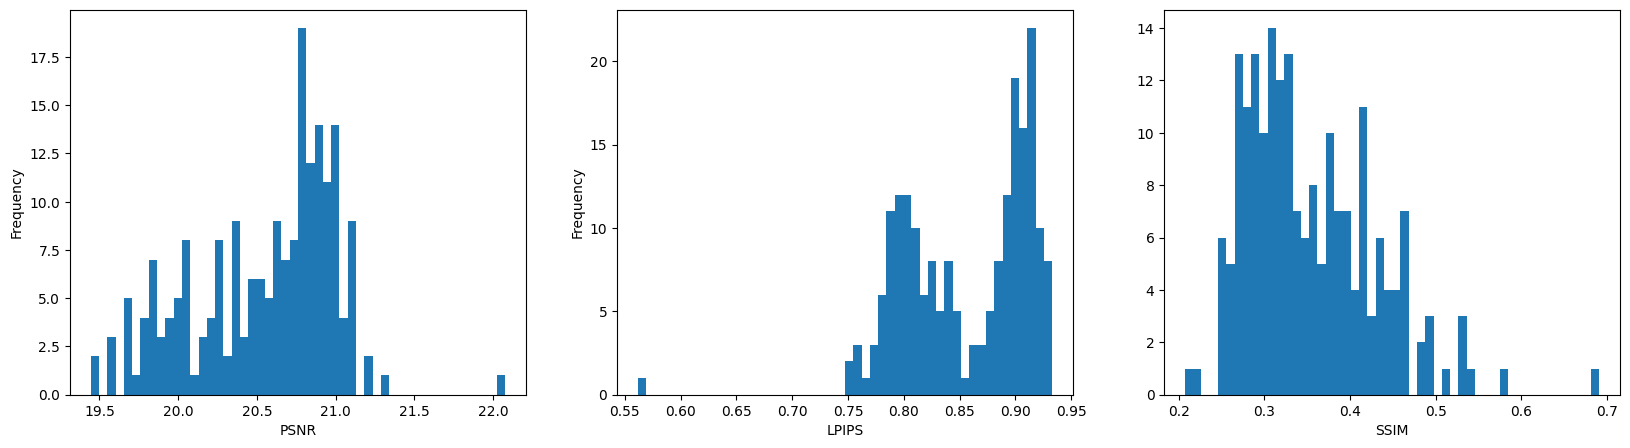

In [28]:
store_metrics = np.asarray(store_metrics)

#Plot store_metrics as bin plots as subplots
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.hist(store_metrics[:,0],bins=50)
plt.xlabel("PSNR")
plt.ylabel("Frequency")
plt.subplot(1,3,2)
plt.hist(store_metrics[:,2],bins=50)
plt.xlabel("LPIPS")
plt.ylabel("Frequency")
plt.subplot(1,3,3)
plt.hist(store_metrics[:,1],bins=50)
plt.xlabel("SSIM")
plt.show()